In [1]:
import pandas as pd
import numpy as np
import seaborn as sa
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv('Kidney_data.csv')

In [3]:
dataset.head()

,id,age,blood pressure,specific gravity,albumin,suger,red blood cells,pus cell,pus cell clumps,bacteria,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,peda edema,aanemia,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood pressure           388 non-null    float64
 3   specific gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   suger                    351 non-null    float64
 6   red blood cells          248 non-null    object 
 7   pus cell                 335 non-null    object 
 8   pus cell clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood glucose random     356 non-null    float64
 11  blood urea               381 non-null    float64
 12  serum creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

In [5]:
dataset.describe()

,id,age,blood pressure,specific gravity,albumin,suger,blood glucose random,blood urea,serum creatinine,sodium,potassium,haemoglobin
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [6]:
#data preprocessing

In [7]:
missingvalues=dataset.isnull().sum().sort_values()*100/len(dataset)
missingvalues.to_frame

<bound method Series.to_frame of id                          0.00
classification              0.00
peda edema                  0.25
appetite                    0.25
aanemia                     0.25
coronary artery disease     0.50
diabetes mellitus           0.50
hypertension                0.50
pus cell clumps             1.00
bacteria                    1.00
age                         2.25
blood pressure              3.00
serum creatinine            4.25
blood urea                  4.75
blood glucose random       11.00
albumin                    11.50
specific gravity           11.75
suger                      12.25
haemoglobin                13.00
pus cell                   16.25
packed cell volume         17.50
sodium                     21.75
potassium                  22.00
white blood cell count     26.25
red blood cell count       32.50
red blood cells            38.00
dtype: float64>

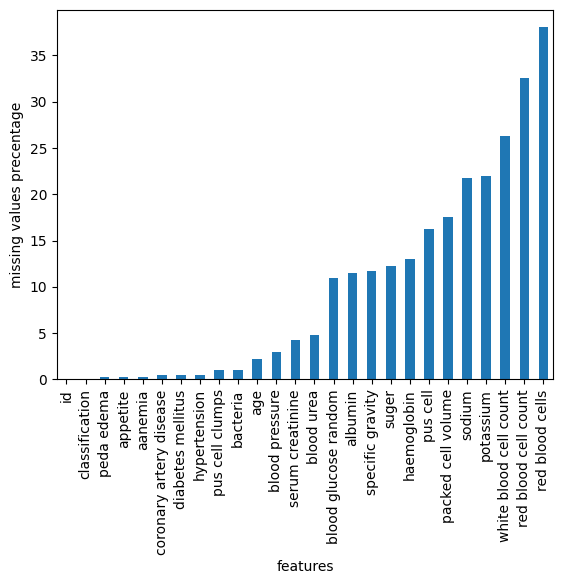

In [8]:
missingvalues.plot(kind='bar')
plt.ylabel('missing values precentage')
plt.xlabel('features')
plt.show()

In [9]:
dataset=dataset.drop(['sodium','potassium','white blood cell count','red blood cell count','red blood cells'],axis=1)

In [10]:
dataset

,id,age,blood pressure,specific gravity,albumin,suger,pus cell,pus cell clumps,bacteria,blood glucose random,...,serum creatinine,haemoglobin,packed cell volume,hypertension,diabetes mellitus,coronary artery disease,appetite,peda edema,aanemia,classification
0,0,48.0,80.0,1.020,1.0,0.0,normal,notpresent,notpresent,121.0,...,1.2,15.4,44,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,normal,notpresent,notpresent,NaN,...,0.8,11.3,38,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,notpresent,notpresent,423.0,...,1.8,9.6,31,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,abnormal,present,notpresent,117.0,...,3.8,11.2,32,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,notpresent,notpresent,106.0,...,1.4,11.6,35,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,notpresent,notpresent,140.0,...,0.5,15.7,47,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,notpresent,notpresent,75.0,...,1.2,16.5,54,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,notpresent,notpresent,100.0,...,0.6,15.8,49,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,notpresent,notpresent,114.0,...,1.0,14.2,51,no,no,no,good,no,no,notckd


In [11]:
dataset['pus cell'] = dataset['pus cell'].replace(to_replace = {'normal' : 0, 'abnormal' : 1})
dataset['pus cell clumps'] = dataset['pus cell clumps'].replace(to_replace = {'notpresent':0,'present':1})
dataset['bacteria'] = dataset['bacteria'].replace(to_replace = {'notpresent':0,'present':1})
dataset['hypertension'] = dataset['hypertension'].replace(to_replace = {'yes' : 1, 'no' : 0})
dataset['diabetes mellitus'] = dataset['diabetes mellitus'].replace(to_replace = {'\tyes':'yes', ' yes':'yes', '\tno':'no'})
dataset['diabetes mellitus'] = dataset['diabetes mellitus'].replace(to_replace = {'yes' : 1, 'no' : 0})
dataset['coronary artery disease'] = dataset['coronary artery disease'].replace(to_replace = {'\tno':'no',})
dataset['coronary artery disease'] = dataset['coronary artery disease'].replace(to_replace = {'yes' : 1, 'no' : 0})
dataset['appetite'] = dataset['appetite'].replace(to_replace={'good':1,'poor':0,'no':np.nan})
dataset['peda edema'] = dataset['peda edema'].replace(to_replace = {'yes' : 1, 'no' : 0})
dataset['aanemia'] = dataset['aanemia'].replace(to_replace = {'yes' : 1, 'no' : 0})

In [12]:
dataset['classification'] = dataset['classification'].replace(to_replace={'ckd\t':'ckd','notckd\t':'notckd'})
dataset['classification'] = dataset['classification'].replace(to_replace = {'ckd' : 1, 'notckd' : 0})

In [13]:
dataset.head()

,id,age,blood pressure,specific gravity,albumin,suger,pus cell,pus cell clumps,bacteria,blood glucose random,...,serum creatinine,haemoglobin,packed cell volume,hypertension,diabetes mellitus,coronary artery disease,appetite,peda edema,aanemia,classification
0,0,48.0,80.0,1.020,1.0,0.0,0.0,0.0,0.0,121.0,...,1.2,15.4,44,1.0,1.0,0.0,1.0,0.0,0.0,1
1,1,7.0,50.0,1.020,4.0,0.0,0.0,0.0,0.0,NaN,...,0.8,11.3,38,0.0,0.0,0.0,1.0,0.0,0.0,1
2,2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,423.0,...,1.8,9.6,31,0.0,1.0,0.0,0.0,0.0,1.0,1
3,3,48.0,70.0,1.005,4.0,0.0,1.0,1.0,0.0,117.0,...,3.8,11.2,32,1.0,0.0,0.0,0.0,1.0,1.0,1
4,4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,106.0,...,1.4,11.6,35,0.0,0.0,0.0,1.0,0.0,0.0,1


In [14]:
 dataset=dataset.fillna(dataset.median())

C:\Users\sai bharath\AppData\Local\Temp\ipykernel_5836\97269706.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset=dataset.fillna(dataset.median())


In [15]:
dataset.head()

,id,age,blood pressure,specific gravity,albumin,suger,pus cell,pus cell clumps,bacteria,blood glucose random,...,serum creatinine,haemoglobin,packed cell volume,hypertension,diabetes mellitus,coronary artery disease,appetite,peda edema,aanemia,classification
0,0,48.0,80.0,1.020,1.0,0.0,0.0,0.0,0.0,121.0,...,1.2,15.4,44,1.0,1.0,0.0,1.0,0.0,0.0,1
1,1,7.0,50.0,1.020,4.0,0.0,0.0,0.0,0.0,121.0,...,0.8,11.3,38,0.0,0.0,0.0,1.0,0.0,0.0,1
2,2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,423.0,...,1.8,9.6,31,0.0,1.0,0.0,0.0,0.0,1.0,1
3,3,48.0,70.0,1.005,4.0,0.0,1.0,1.0,0.0,117.0,...,3.8,11.2,32,1.0,0.0,0.0,0.0,1.0,1.0,1
4,4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,106.0,...,1.4,11.6,35,0.0,0.0,0.0,1.0,0.0,0.0,1


C:\Users\sai bharath\AppData\Local\Temp\ipykernel_5836\944472505.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sa.heatmap(dataset.corr(), annot=True, cmap='YlGnBu')


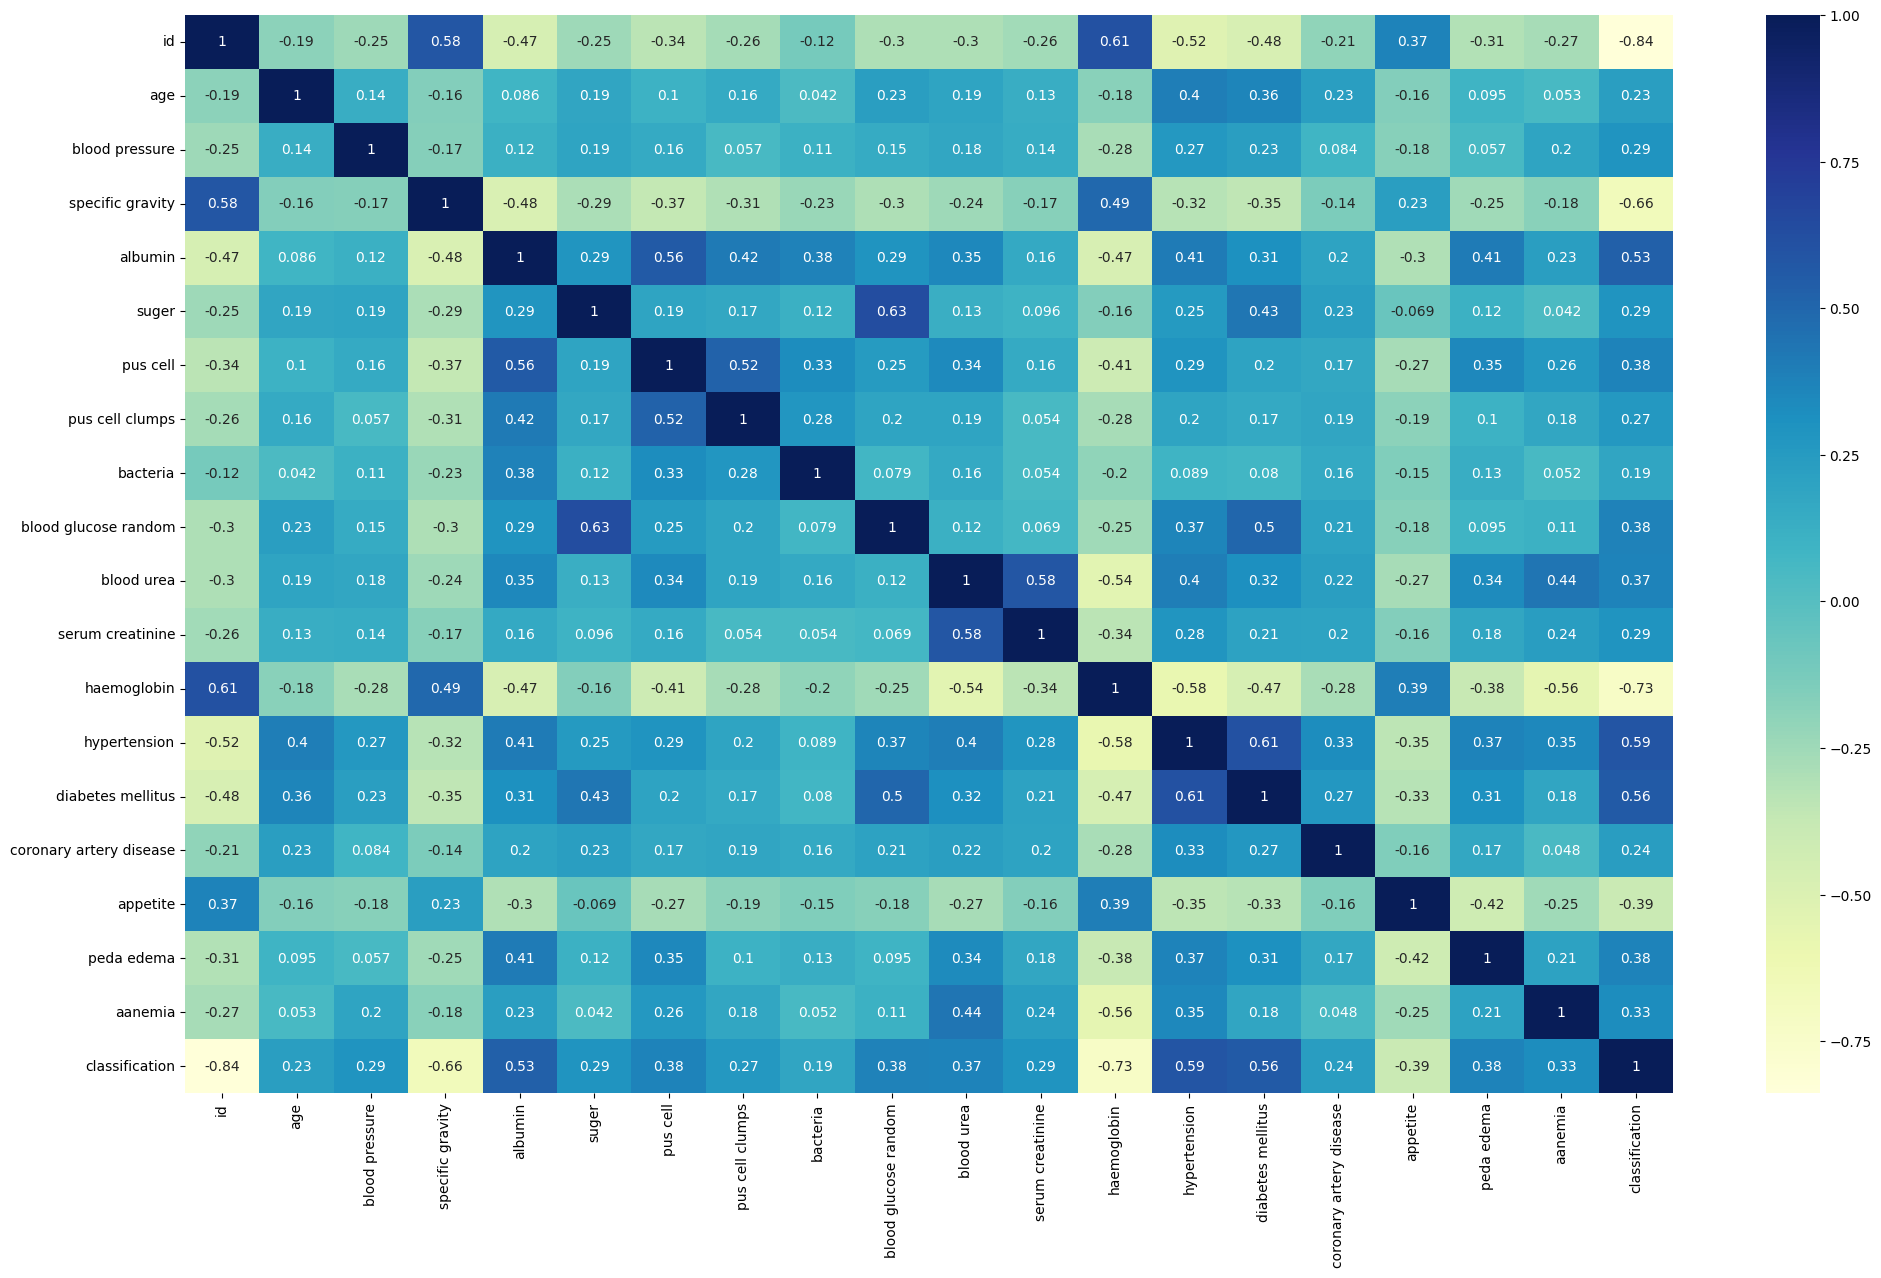

In [16]:
plt.figure(figsize=(24,14))
sa.heatmap(dataset.corr(), annot=True, cmap='YlGnBu')
plt.show()

<AxesSubplot: xlabel='suger', ylabel='blood glucose random'>

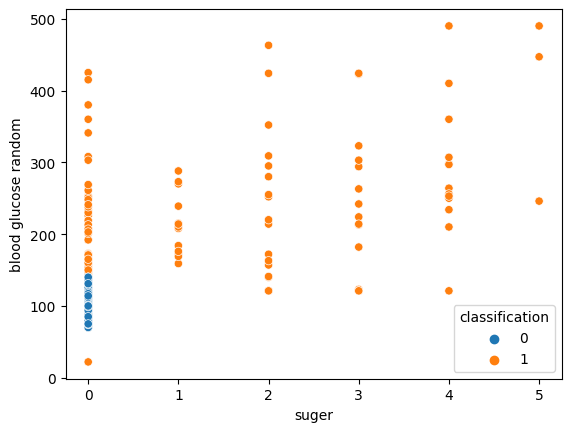

In [17]:
sa.scatterplot(data=dataset,x='suger',y='blood glucose random',hue='classification')

<AxesSubplot: xlabel='haemoglobin', ylabel='Density'>

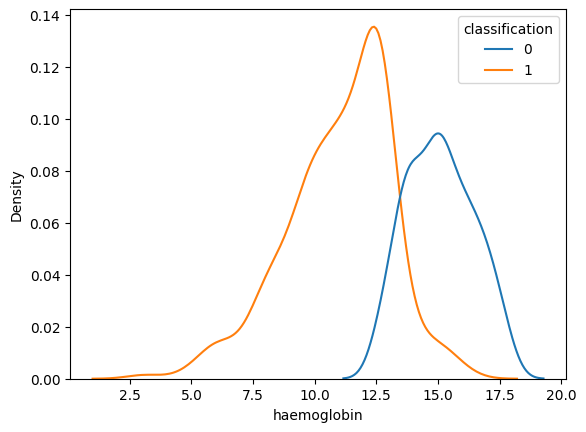

In [18]:
sa.kdeplot(data=dataset,x='haemoglobin',hue='classification')

<AxesSubplot: xlabel='specific gravity', ylabel='Density'>

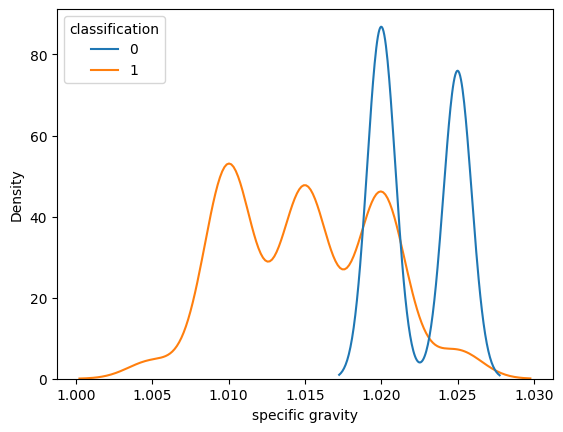

In [19]:
sa.kdeplot(data=dataset,x='specific gravity',hue='classification')

<AxesSubplot: ylabel='haemoglobin'>

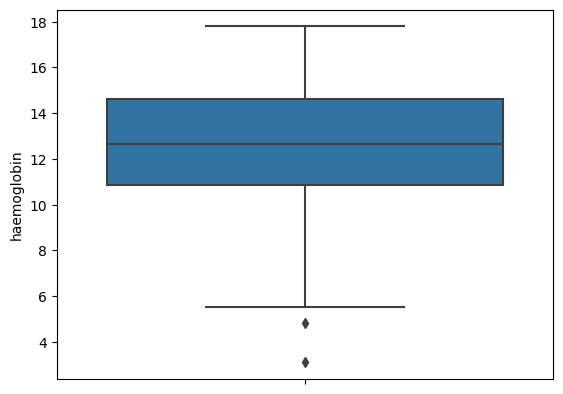

In [20]:
sa.boxplot(data=dataset,y='haemoglobin')

In [21]:
dataset.columns

Index(['id', 'age', 'blood pressure', 'specific gravity', 'albumin', 'suger',
       'pus cell', 'pus cell clumps', 'bacteria', 'blood glucose random',
       'blood urea', 'serum creatinine', 'haemoglobin', 'packed cell volume',
       'hypertension', 'diabetes mellitus', 'coronary artery disease',
       'appetite', 'peda edema', 'aanemia', 'classification'],
      dtype='object')

In [23]:
X=[['haemoglobin','hypertension','diabetes mellitus','specific gravity','albumin','aanemia','serum creatinine']]